In [1]:
import json 
import logging
import copy
import sys
import ast
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import ast 

# Dynamically get the backend path relative to the notebook location
notebook_path = Path().resolve()
project_root = notebook_path.parents[1]  # Go up to project root (adjust if needed)
sys.path.insert(0, str(project_root))
local_path = project_root / 'back_end'
sys.path.insert(0, str(local_path))

from src.utils.utils import *
from src.utils.logging_utils import *
from main import *
from plotting import *

multimer_size = 4

# download CSV files
def download_data_dict(multimer_size):
    input_dir = project_root / 'back_end' / 'data' / 'filtered_reaction_database' / f'multimer_size_{multimer_size}'

    combined_database = pd.read_csv(input_dir / 'combined_database.csv', index_col=0)
    context_history = pd.read_csv(input_dir / 'context_history.csv', index_col=0)
    donor_history = pd.read_csv(input_dir / 'donor_history.csv', index_col=0)
    reaction_history = pd.read_csv(input_dir / 'reaction_history.csv', index_col=0)
    ubiquitin_history = pd.read_csv(input_dir / 'ubiquitin_history.csv', index_col=0)

    return {
        'combined_database': combined_database,
        'context_history': context_history,
        'donor_history': donor_history,
        'reaction_history': reaction_history,
        'ubiquitin_history': ubiquitin_history
    }

data_dict = download_data_dict(multimer_size)
combined_database = data_dict['combined_database']
context_history = data_dict['context_history']
donor_history = data_dict['donor_history']
reaction_history = data_dict['reaction_history']
ubiquitin_history = data_dict['ubiquitin_history']

In [2]:
selected_ids = ["Ub4_5","Ub4_13","Ub4_13","Ub4_13","Ub4_10","Ub4_2","Ub4_2","Ub4_2","Ub4_2","Ub4_2","Ub4_2","Ub4_2","Ub4_2","Ub4_8"]
indexes = list()

for id in selected_ids:
    new_index = int(combined_database[(combined_database['multimer_id'] == id) & (combined_database['used_in_synthesis'] == 1)]['index'].unique()[0])
    indexes.append(new_index)


/Users/ekummelstedt/le_code_base/ubiquitinformatics/back_end/src/plotting.py:487: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimer_acceptors_96['dimer_names'] = dimer_acceptors_96['dimer_formation'].apply(
/Users/ekummelstedt/le_code_base/ubiquitinformatics/back_end/src/plotting.py:492: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dimer_acceptors_96['dimers_encoded'] = dimer_acceptors_96['dimer_names'].map(dimer_encoded_dictionary)
/Users/ekummelstedt/le_code_base/ubiquitinformatics/back_end/src/plottin

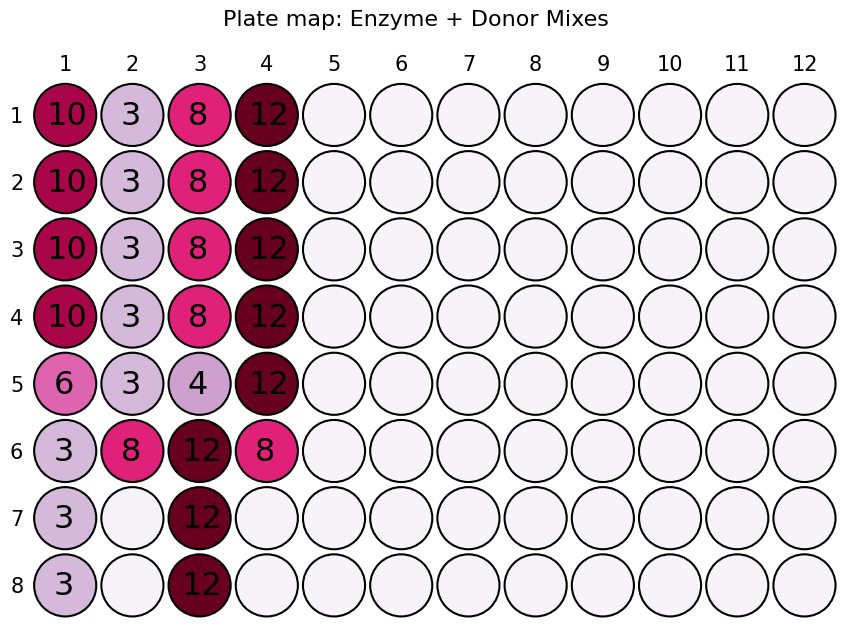

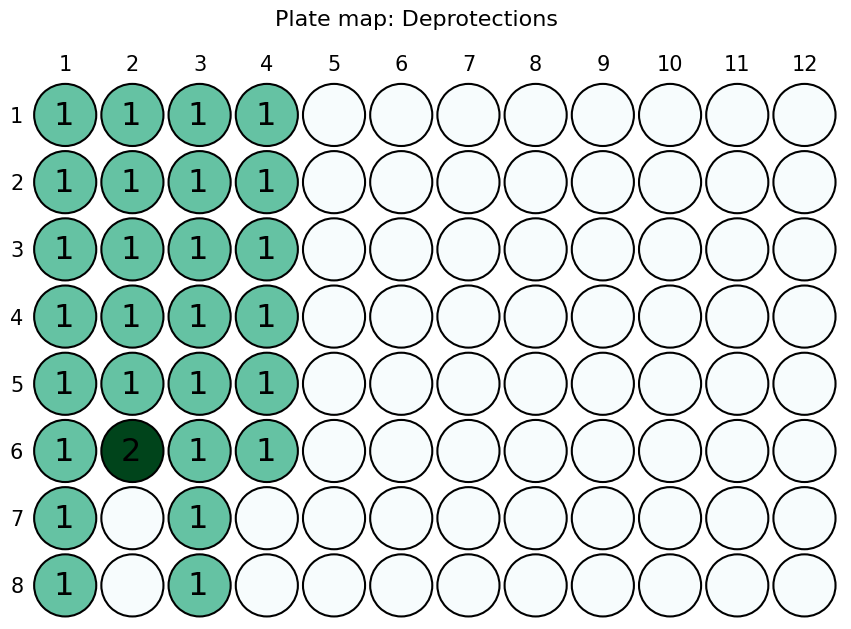

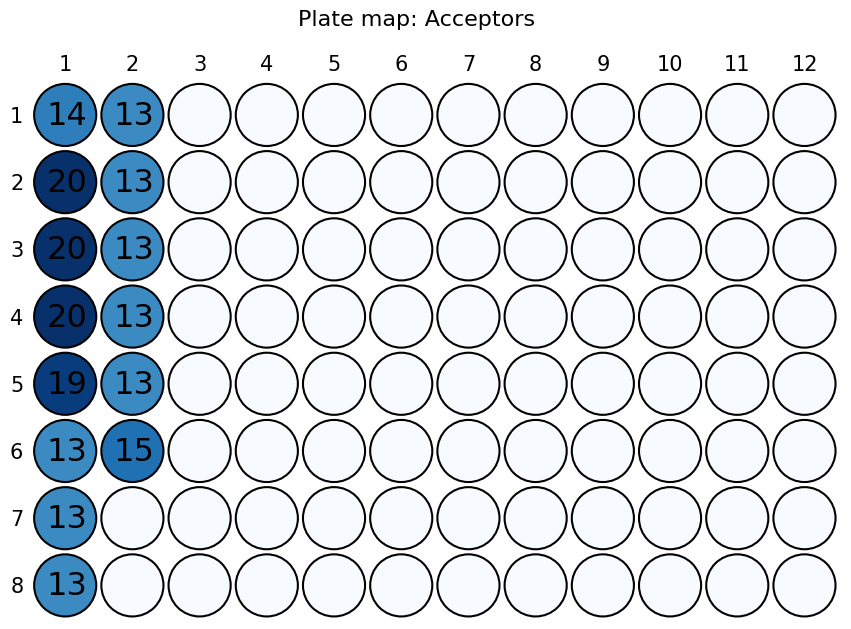

In [3]:
# Create plate maps for acceptors and deprotections
# Indexed values for tetramers and pentamers
# test_indexed_values_tetramers = [423, 427, 363, 31, 443, 447, 95, 143, 191, 315, 319, 279, 335, 339]
# test_indexed_values_pentamers = [
#     2035, 2039, 1975, 1655, 47, 2055, 2059, 1719, 111, 1735, 1739, 1039, 127, 871,
#     2143, 2147, 2107, 1075, 2163, 2167, 431, 411, 875, 639, 643, 479, 787, 835,
#     1491, 1495, 1475, 1307, 1511, 1515, 1311, 1223, 1271, 1599, 1603, 1563, 1619, 1623
# ]


# if multimer_size == 4:
#     indexed_values = test_indexed_values_tetramers
# elif multimer_size == 5:
#     indexed_values = test_indexed_values_pentamers[1:16]

output_dict = inner_create_plate_dfs(data_dict, indexes, multimer_size)

enzymes_donors_96 = output_dict['enzymes_donors_96']
deprots_96 = output_dict['deprots_96']
acceptors_96 = output_dict['dimer_acceptors_96']

fig1, ax1 = plot_96wells(cdata=enzymes_donors_96, figure=1, figure_name='Plate map: Enzyme + Donor Mixes', colorbar_type='PuRd')
fig2, ax2 = plot_96wells(cdata=deprots_96, figure=2, figure_name='Plate map: Deprotections', colorbar_type='BuGn')
fig3, ax3 = plot_96wells(cdata=acceptors_96, figure=3, figure_name='Plate map: Acceptors', colorbar_type='Blues')

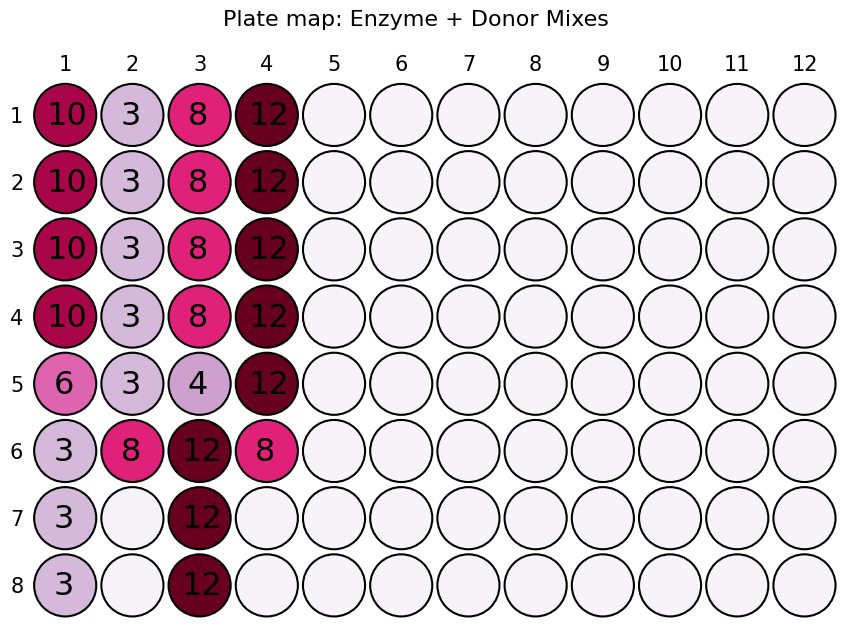

In [4]:
fig1

In [6]:
output_dict

{'enzymes_donors_96':    trimer_e_d_encoded_1  trimer_e_d_encoded_2  tetramer_e_d_encoded_1  \
 0                    10                     3                       8   
 1                    10                     3                       8   
 2                    10                     3                       8   
 3                    10                     3                       8   
 4                     6                     3                       4   
 5                     3                     8                      12   
 6                     3                     0                      12   
 7                     3                     0                      12   
 
    tetramer_e_d_encoded_2  padding_5  padding_6  padding_7  padding_8  \
 0                      12          0          0          0          0   
 1                      12          0          0          0          0   
 2                      12          0          0          0          0   
 3             

In [15]:
def count_nonzero_values(df):
    """
    Counts occurrences of non-zero values in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        dict: Dictionary of value counts, excluding zeros.
    """
    counts = pd.Series(df.values.ravel())
    return counts[counts != 0].value_counts().sort_index().to_dict()

In [21]:
enzymes_donors_96 = output_dict['enzymes_donors_96']
deprots_96 = output_dict['deprots_96']
acceptors_96 = output_dict['dimer_acceptors_96']

# pull dictionaries from the output_dict
e_d_encoded_dictionary = output_dict['e_d_encoded_dictionary']
deprot_encoded_dictionary = output_dict['deprot_encoded_dictionary']
dimer_encoded_dictionary = output_dict['dimer_encoded_dictionary']

# Count non-zero values in each DataFrame
enzymes_donors_96_counts = count_nonzero_values(enzymes_donors_96)
deprots_96_counts = count_nonzero_values(deprots_96)
acceptors_96_counts = count_nonzero_values(acceptors_96)

print(enzymes_donors_96_counts)
print(deprots_96_counts)
print(acceptors_96_counts)

{3: 8, 4: 1, 6: 1, 8: 6, 10: 4, 12: 8}
{1: 27, 2: 1}
{13: 8, 14: 1, 15: 1, 19: 1, 20: 3}


In [28]:
def map_keys_to_values(dict1, dict2):
    """
    Maps keys from dict1 to values from dict2 using dict1's values as lookup keys in dict2.

    Parameters:
        dict1 (dict): Source of keys and intermediate values.
        dict2 (dict): Lookup dictionary for final values.

    Returns:
        dict: A new dictionary mapping keys from dict1 to values from dict2.
    """
    return {k: dict2.get(v) for k, v in dict1.items()}

# Map the encoded dictionaries to their respective values
e_d_mapped = map_keys_to_values(e_d_encoded_dictionary, enzymes_donors_96_counts)
e_d_mapped.keys()

dict_keys([('ubi_ubq_1_K48_SMAC', 'gp78/Ube2g2'), ('ubi_ubq_1_K48_SMAC_K63_ABOC', 'gp78/Ube2g2'), ('ubi_ubq_1_K48_ABOC_K63_SMAC', 'gp78/Ube2g2'), ('ubi_ubq_1_K48_ABOC_K63_ABOC', 'gp78/Ube2g2'), ('ubi_ubq_1_K48_SMAC', 'Ube2K'), ('ubi_ubq_1_K48_SMAC_K63_ABOC', 'Ube2K'), ('ubi_ubq_1_K48_ABOC_K63_SMAC', 'Ube2K'), ('ubi_ubq_1_K48_ABOC_K63_ABOC', 'Ube2K'), ('ubi_ubq_1_K63_SMAC', 'Ubc13/Mms2'), ('ubi_ubq_1_K48_SMAC_K63_ABOC', 'Ubc13/Mms2'), ('ubi_ubq_1_K48_ABOC_K63_SMAC', 'Ubc13/Mms2'), ('ubi_ubq_1_K48_ABOC_K63_ABOC', 'Ubc13/Mms2')])

In [ ]:
# create amount needed for needed for each synthesis of dimer acceptor and enzyme & donor
# output is nmol of each component in the reaction
# nmol of each component into the final reaction 
final_concentrations = {
    # E1 enzyme
    'hUba1': 1,  # in µM
    # E2 enzymes
    'Ubc13/Mms2': 20,  # in µM
    'gp78/Ube2g2': 20,  # in µM
    'Ube2K': 20,  # in µM
    # Ubiquitins
    'Donors': 20,  # in µM
    'Acceptor Dimer Concentration': 10,  # in nmol
    'Reaction Volume [uL]': 200  # in µL
}

masses = {
    'hUba1': 116300,  # in Da
    'Ubc13/Mms2': 33800,  # in Da
    'gp78/Ube2g2': 27600,  # in Da
    'Ube2K': 22400,  # in Da
    # Acceptor monomers
    'histag_ubi_ubq_1' : 9527, # in Da
    'histag_ubi_ubq_1_K48_aboc' : 9658, # in Da
    'histag_ubi_ubq_1_K63_aboc' : 9658, # in Da
    # Donors 
    'ubi_ubq_1_K48_ABOC_K63_ABOC': 8851, # in Da 
    'ubi_ubq_1_K48_SMAC_K63_ABOC': 8864, # in Da
    'ubi_ubq_1_K48_ABOC_K63_SMAC': 8864, # in Da
    'ubi_ubq_1_K48_SMAC': 8733.00, # in Da
    'ubi_ubq_1_K63_SMAC': 8733.00, # in Da
    # Acceptor dimers
    'his-GG-1ubq-1-(<K48_1ubq-2-(<K48_SMAC><K63_ABOC>)>)' : 18372,
    'his-GG-1ubq-1-(<K48_1ubq-2-(<K48_ABOC><K63_SMAC>)>)' : 18372,
    'his-GG-1ubq-1-(<K48_1ubq-2-(<K48_ABOC><K63_ABOC>)>)' : 18360,

    'his-GG-1ubq-1-(<K48_1ubq-2-(<K48_SMAC>)><K63_ABOC>)': 18372,
    'his-GG-1ubq-1-(<K48_1ubq-2-(<K48_SMAC><K63_ABOC>)><K63_ABOC>)': 18504,
    'his-GG-1ubq-1-(<K48_1ubq-2-(<K48_ABOC><K63_SMAC>)><K63_ABOC>)': 18504,

    'his-GG-1ubq-1-(<K63_1ubq-2-(<K48_SMAC><K63_ABOC>)>)': 18372,
    'his-GG-1ubq-1-(<K63_1ubq-2-(<K48_ABOC><K63_SMAC>)>)': 18372,
    'his-GG-1ubq-1-(<K63_1ubq-2-(<K48_ABOC><K63_ABOC>)>)': 18360,

    'his-GG-1ubq-1-(<K48_ABOC><K63_1ubq-2-(<K63_SMAC>)>)': 18372,
    'his-GG-1ubq-1-(<K48_ABOC><K63_1ubq-2-(<K48_SMAC><K63_ABOC>)>)': 18504,
    'his-GG-1ubq-1-(<K48_ABOC><K63_1ubq-2-(<K48_ABOC><K63_SMAC>)>)': 18504

    }


# times 1.1x the amount of volume reaction 110uL 
# then sum the amounts and the final volume amount also times by 1.1x

# You make the final concentrations of the donor solution 
# = 100uL
# Find the number of nmol of each component you need to make 
# Donor 
# 
# You also need ATP/Mg2+ and TCEP buffer


# You make the final concentrations of the E2 + E1 solution 
# = 100uL
# Find the number of nmol of each component you need to make 
# Uba1 
# E2
# 
# You also need ATP/Mg2+ and TCEP buffer








E1_info_df = pd.DataFrame(E1_info)
E2_info_df = pd.DataFrame(E2_info)
monomer_info_df  = pd.DataFrame(monomer_info)

## reaction volume
monomer_info_df['Reaction Volume [uL]'] = final_concentrations['Reaction Volume [uL]']
E2_info_df['Reaction Volume [uL]'] = final_concentrations['Reaction Volume [uL]']
E1_info_df['Reaction Volume [uL]'] = final_concentrations['Reaction Volume [uL]']

monomer_info_df = monomer_info_df.merge(monomer_or_enzyme_df, on= 'enzymes or monomer')
E2_info_df = E2_info_df.merge(monomer_or_enzyme_df, on= 'enzymes or monomer')
E1_info_df['count'] = int(E2_info_df['count'].sum())

## get the starting concs.
all_info_df = pd.concat([E1_info_df, E2_info_df, monomer_info_df], axis = 0).reset_index().drop('index', axis=1)
## get the reconstitution volume which is 3 times the final conc. 
all_info_df['Stock Concentration [mmol/L]'] = 0
for i in list(all_info_df['enzymes or monomer'].unique()):
    index = all_info_df[all_info_df['enzymes or monomer'] == i].index[0]
    all_info_df.at[index, 'Stock Concentration [mmol/L]'] = stock_amounts_dict[i]/1000

## Total values
all_info_df['Total Mols [mmol]'] = all_info_df['Reaction Concentration [mmol/L]']* (all_info_df['Reaction Volume [uL]'] /1000000) * all_info_df['count']
all_info_df['Total Mass [mg]'] = all_info_df['Total Mols [mmol]'] * all_info_df['Molecular_Weight [Da]'] 
all_info_df['Total Stock Volume Needed [uL]'] = (all_info_df['Total Mols [mmol]']/ all_info_df['Stock Concentration [mmol/L]'])*1000000

## add in stock conc. 
## 
## 
enzyme_mix_monomer_df[['Monomer', 'Enzymes']] = enzyme_mix_monomer_df['enzymes + monomer'].str.split('+', expand=True)
enzyme_mix_monomer_df['Enzymes'] = enzyme_mix_monomer_df['Enzymes'].str.replace(' ', '')
enzyme_mix_monomer_df['Monomer'] = enzyme_mix_monomer_df['Monomer'].str.replace(' ', '')

enzyme_mix_monomer_df['Enzymes Stock Concentration [mmol/L]'] = enzyme_mix_monomer_df['Enzymes'].map(stock_amounts_dict)   
enzyme_mix_monomer_df['Enzymes Stock Concentration [mmol/L]'] = enzyme_mix_monomer_df['Enzymes Stock Concentration [mmol/L]']/1000
enzyme_mix_monomer_df['Enzymes Final Concentration [mmol/L]'] = enzyme_mix_monomer_df['Enzymes'].map(final_concentrations)   
enzyme_mix_monomer_df['Enzymes Final Concentration [mmol/L]'] = enzyme_mix_monomer_df['Enzymes Final Concentration [mmol/L]']/1000

enzyme_mix_monomer_df['Monomer Stock Concentration [mmol/L]'] = enzyme_mix_monomer_df['Monomer'].map(stock_amounts_dict)   
enzyme_mix_monomer_df['Monomer Stock Concentration [mmol/L]'] = enzyme_mix_monomer_df['Monomer Stock Concentration [mmol/L]']/1000
enzyme_mix_monomer_df['Monomer Final Concentration [mmol/L]'] = enzyme_mix_monomer_df['Monomer'].map(final_concentrations)   
enzyme_mix_monomer_df['Monomer Final Concentration [mmol/L]'] = enzyme_mix_monomer_df['Monomer Final Concentration [mmol/L]']/1000

enzyme_mix_monomer_df['hUba1 Stock Concentration [mmol/L]'] = stock_amounts_dict['hUba1']
enzyme_mix_monomer_df['hUba1 Final Concentration [mmol/L]'] = final_concentrations['hUba1'] 


enzyme_mix_monomer_df['Reaction Volume [uL]'] = final_concentrations['Reaction Volume [uL]']
enzyme_mix_monomer_df['Total Volume [uL]'] = enzyme_mix_monomer_df['count']*enzyme_mix_monomer_df['Reaction Volume [uL]']

enzyme_mix_monomer_df['Enzymes Stock Volume [uL]'] = (enzyme_mix_monomer_df['Total Volume [uL]'] * enzyme_mix_monomer_df['Enzymes Final Concentration [mmol/L]'])/ enzyme_mix_monomer_df['Enzymes Stock Concentration [mmol/L]']
enzyme_mix_monomer_df['Monomer Stock Volume [uL]'] = (enzyme_mix_monomer_df['Total Volume [uL]'] * enzyme_mix_monomer_df['Monomer Final Concentration [mmol/L]'])/ enzyme_mix_monomer_df['Monomer Stock Concentration [mmol/L]']
enzyme_mix_monomer_df['hUba1 Stock Volume [uL]'] = (enzyme_mix_monomer_df['Total Volume [uL]'] * enzyme_mix_monomer_df['hUba1 Final Concentration [mmol/L]'])/ enzyme_mix_monomer_df['hUba1 Stock Concentration [mmol/L]']

enzyme_mix_monomer_df['Buffer Volume [uL]'] = enzyme_mix_monomer_df['Total Volume [uL]'] - enzyme_mix_monomer_df['Enzymes Stock Volume [uL]'] - enzyme_mix_monomer_df['Monomer Stock Volume [uL]']- enzyme_mix_monomer_df['hUba1 Stock Volume [uL]']

#enzyme_mix_monomer_df['Enzymes Volume [uL]']
#enzyme_mix_monomer_df['Monomer Volume [uL]']
#enzyme_mix_monomer_df['hUba1 Volume [uL]']

enzyme_mix_monomer_df = enzyme_mix_monomer_df[["enzymes + monomer", 
                                            "E + M_code",
                                            "count",
                                            "Reaction Volume [uL]",
                                            "Total Volume [uL]",
                                            "Monomer",
                                            "Monomer Final Concentration [mmol/L]",
                                            "Monomer Stock Concentration [mmol/L]",
                                            "Monomer Stock Volume [uL]","Enzymes",
                                            "Enzymes Final Concentration [mmol/L]",
                                            "Enzymes Stock Concentration [mmol/L]",
                                            "Enzymes Stock Volume [uL]","hUba1 Final Concentration [mmol/L]",
                                            "hUba1 Stock Concentration [mmol/L]","hUba1 Stock Volume [uL]",
                                            "Buffer Volume [uL]"]]

acceptor_file_path = pd.read_csv('/Users/ekummelstedt/le_code_base/ubiquitin_syn/Ubiquitin_Scripts/aa_looping_through_builders/.data/data_for_analysis/acceptor_df.csv')
acceptor_info_df = acceptor_count_df.merge(acceptor_file_path, on= 'acceptor_string')

acceptor_info_df['Final Concentration [mmol/L]'] = final_concentrations['Acceptor Concentration']/1000 #  volumes in µL
acceptor_info_df['Molecular_Weight [Da]'] = 18522.07
acceptor_info_df['Total Volume [uL]'] = acceptor_info_df['count']*final_concentrations['Reaction Volume [uL]']
acceptor_info_df['Total Mols [mmol]'] = acceptor_info_df['Final Concentration [mmol/L]']* (acceptor_info_df['Total Volume [uL]'] /1000000)
acceptor_info_df['Total Mass [mg]'] = acceptor_info_df['Total Mols [mmol]'] * acceptor_info_df['Molecular_Weight [Da]']

acceptor_info_df = acceptor_info_df[['acceptor_string', 
                                        'acceptor_number', 
                                        'starting_acceptor', 
                                        'enzyme', 
                                        'monomer',
                                        'count',
                                        'Final Concentration [mmol/L]', 
                                        'Molecular_Weight [Da]',
                                        'Total Volume [uL]', 
                                        'Total Mols [mmol]', 
                                        'Total Mass [mg]']]

count_deprot_df['Total Volume [mL]'] = 0
count_deprot_df['Reaction Volume [uL]'] = 200


# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(".data/excel_cal_concs/" + file_name + str(start_row +1) + " to " + str(start_row+ 14) + ".xlsx", engine="xlsxwriter")

## sheet 1 is for just final cal amounts...
## sheet 2 provides all the  calculations... maybe add in later...
## have both sheets and heat maps solved by end of day...

## what do we want
# how much buffer we need...
## SHEET 1 = "Full_Calculations"
#1 dimer amounts
acceptor_info_df.to_excel(writer, sheet_name="Full_Calculations",startrow=2 , startcol=0)
#2 individual amounts of everything
all_info_df.to_excel(writer, sheet_name="Full_Calculations",startrow=(len(acceptor_info_df)+ 5), startcol=0)
#3 mix amounts
enzyme_mix_monomer_df.to_excel(writer, sheet_name="Full_Calculations",startrow=(len(acceptor_info_df)+ 5 + len(all_info_df) + 4) , startcol=0)
#4 smac or deprot amounts
count_deprot_df.to_excel(writer, sheet_name="Full_Calculations",startrow=(len(enzyme_mix_monomer_df) + 5 + len(acceptor_info_df)+ 4 + len(all_info_df) + 4) , startcol=0)

full_calc_sheets = writer.sheets['Full_Calculations']
full_calc_sheets.write(0,0,(file_name + "  " + str(start_row +1) + " to " + str(start_row+ 14)))
full_calc_sheets.write(1,0,'Acceptor Calculations')
full_calc_sheets.write((len(acceptor_info_df)+ 4),0,'Monomer and Enyzme Calculations')
full_calc_sheets.write((len(acceptor_info_df)+ 5 + len(all_info_df) + 3),0,'Monomer/Enzyme Mix Calculations')
full_calc_sheets.write((len(enzyme_mix_monomer_df) + 5 + len(acceptor_info_df)+ 4 + len(all_info_df) + 3),0,'Smac/Fake deprot Calculations')

# Close the Pandas Excel writer and output the Excel file
writer.close()